In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [4]:
def load_trend(trend_name='football', country_code='us'):
    df = pd.read_csv('data/google-trends_'
                     + trend_name + '_'
                     + country_code
                     + '.csv').iloc[1:, :]
    df.columns = ['values']
    df['values'] = df['values'].str.replace('<1', '0').astype(int)
    return df

In [5]:
df = load_trend(**{'trend_name': 'data-science', 'country_code': 'us'})

In [6]:
trends = [
    {'trend_name': 'data-science', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'us'},
    {'trend_name': 'football', 'country_code': 'uk'},
    {'trend_name': 'game-of-thrones', 'country_code': 'us'},
    {'trend_name': 'pokemon', 'country_code': 'us'},
    {'trend_name': 'taxes', 'country_code': 'us'},   
]

In [7]:
np.random.shuffle(trends)

In [8]:
trend_dfs = [load_trend(**trend) for trend in trends]

In [9]:
trend_df = trend_dfs[0]

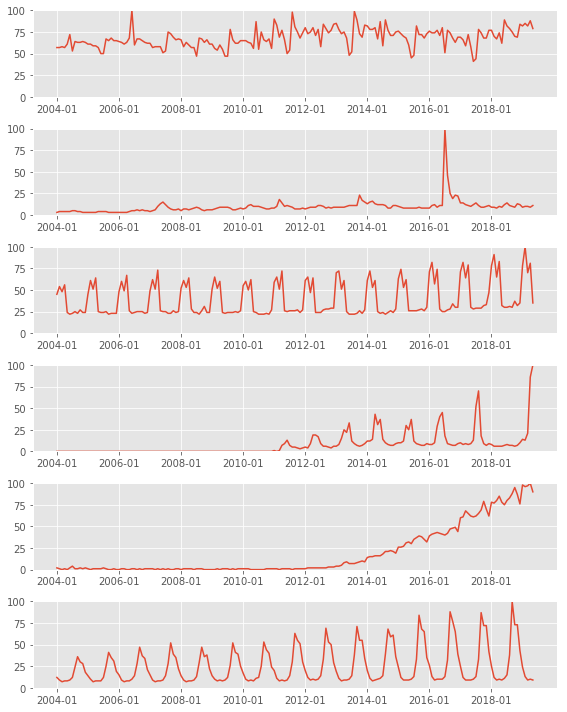

In [10]:
import matplotlib; matplotlib.style.use('ggplot')

fig, axs = plt.subplots(len(trend_dfs), 1, figsize=(8, 10))
plt.tight_layout()
for i, trend_df in enumerate(trend_dfs):
    ax = axs[i]
    #ax.set_title(str(trends[i]))
    ax.plot(trend_df.index, trend_df['values'])
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
    ax.set_xticks([tick for tick in ticks if tick%24 == 0])

In [17]:
trends

[{'trend_name': 'football', 'country_code': 'uk'},
 {'trend_name': 'pokemon', 'country_code': 'us'},
 {'trend_name': 'taxes', 'country_code': 'us'},
 {'trend_name': 'game-of-thrones', 'country_code': 'us'},
 {'trend_name': 'data-science', 'country_code': 'us'},
 {'trend_name': 'football', 'country_code': 'us'}]

In [11]:
taxes_df = load_trend('taxes')
taxes_df['i'] = np.arange(len(taxes_df))
taxes_df['month'] = taxes_df['i'] % 12

In [19]:
taxes_df['month']+=1

In [22]:
taxes_df.head(15)

,values,i,month
2004-01,45,0,1
2004-02,54,1,2
2004-03,48,2,3
2004-04,56,3,4
2004-05,24,4,5
2004-06,22,5,6
2004-07,23,6,7
2004-08,25,7,8
2004-09,23,8,9
2004-10,27,9,10


In [12]:
trend_model = LinearRegression()
trend_model.fit(taxes_df[['i']], taxes_df['values'])
trend_line = trend_model.predict(taxes_df[['i']])

In [13]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(taxes_df[['month']])
month_data = month_encoder.transform(taxes_df[['month']]).toarray()

In [14]:
lr = LinearRegression()
data = np.hstack((taxes_df[['i']].values, month_data))
lr.fit(data, taxes_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

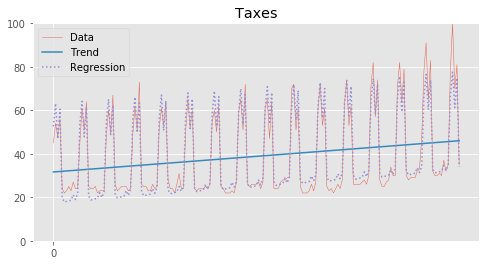

In [15]:
trend_df = taxes_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Taxes')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

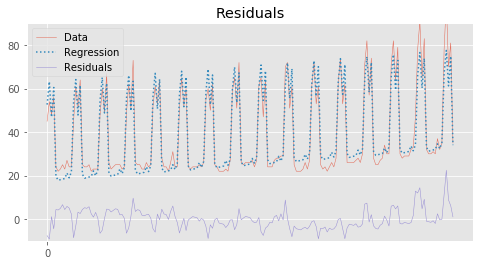

In [16]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [33]:
#now capture for another trend
football_uk_df = load_trend(**{'trend_name': 'football', 'country_code': 'uk'})

In [34]:
football_uk_df['i'] = np.arange(len(football_uk_df))
football_uk_df['month'] = football_uk_df['i'] % 12

In [41]:
# football_uk_df

In [36]:
trend_model = LinearRegression()
trend_model.fit(football_uk_df[['i']], football_uk_df['values'])
trend_line = trend_model.predict(football_uk_df[['i']])

In [37]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(football_uk_df[['month']])
month_data = month_encoder.transform(football_uk_df[['month']]).toarray()

In [38]:
lr = LinearRegression()
data = np.hstack((football_uk_df[['i']].values, month_data))
lr.fit(data, football_uk_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

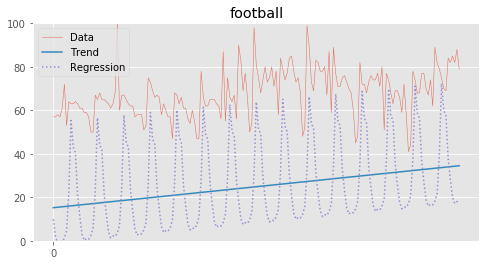

In [89]:
trend_df = football_uk_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('football')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

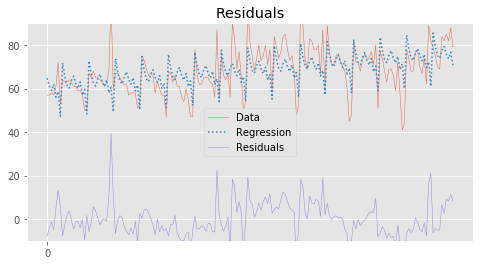

In [40]:
residuals = trend_df['values'] - lr_pred

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Residuals")
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
ax.plot(trend_df['i'], residuals,
        label='Residuals', linewidth=.5)

#ax.plot(trend_df.index, trend_line, label='trend')
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((-10, 90))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [57]:
football_us_df = load_trend(**{'trend_name': 'football', 'country_code': 'us'})

In [83]:
football_us_df['i'] = np.arange(len(football_us_df)) 
#football_us_df['i'] // 2 converts months 0>0 2>1 4>2 6>3 8 >4 10>5 12>6 
#and % 6 puts it in continuation beyond first year
football_us_df['bimonth'] = (football_us_df['i'] // 2) % 6   

In [84]:
trend_model = LinearRegression()
trend_model.fit(football_us_df[['i']], football_us_df['values'])
trend_line = trend_model.predict(football_us_df[['i']])

In [85]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(football_us_df[['bimonth']])
month_data = month_encoder.transform(football_us_df[['bimonth']]).toarray()

In [86]:
lr = LinearRegression()
data = np.hstack((football_us_df[['i']].values, month_data))
lr.fit(data, football_us_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

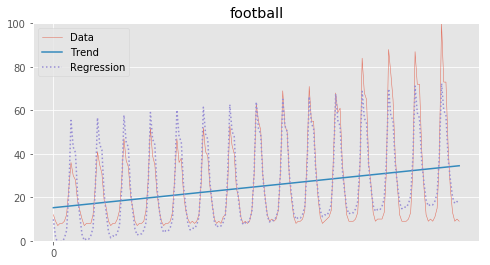

In [87]:
trend_df = football_us_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('football')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [123]:
ds_df = load_trend(**{'trend_name': 'data-science'})

In [124]:
ds_df['i'] = np.arange(len(ds_df)) 
#football_us_df['i'] // 2 converts months 0>0 2>1 4>2 6>3 8 >4 10>5 12>6 
#and % 6 puts it in continuation beyond first year
ds_df['bimonth'] = (ds_df['i'] // 2) % 6  
ds_df = ds_df.loc[ds_df['i'] > 107]
ds_df

,values,i,bimonth
2013-01,4,108,0
2013-02,4,109,0
2013-03,5,110,1
2013-04,8,111,1
2013-05,9,112,2
2013-06,7,113,2
2013-07,7,114,3
2013-08,7,115,3
2013-09,8,116,4
2013-10,9,117,4


In [125]:
trend_model = LinearRegression()
trend_model.fit(ds_df[['i']], ds_df['values'])
trend_line = trend_model.predict(ds_df[['i']])

In [126]:
month_encoder = OneHotEncoder(categories='auto')
month_encoder.fit(ds_df[['bimonth']])
month_data = month_encoder.transform(ds_df[['bimonth']]).toarray()

In [127]:
lr = LinearRegression()
data = np.hstack((ds_df[['i']].values, month_data))
lr.fit(data, ds_df['values'])
lr_pred = lr.predict(data)  # Predixctive model based on i and month

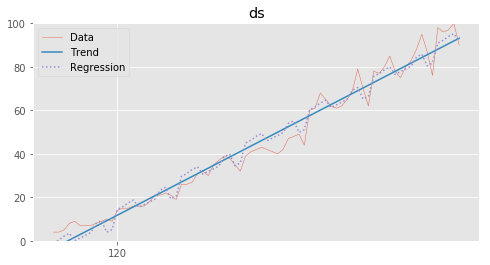

In [128]:
trend_df = ds_df
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('ds')
ax.plot(trend_df['i'], trend_df['values'], label='Data',
       linewidth=.5, alpha=.8)
ax.plot(trend_df['i'], trend_line, label='Trend')
ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted")
plt.legend()
ticks = ax.get_xticks()
ax.set_ylim((0, 100))
ax.set_xticks([tick for tick in ticks if tick%24 == 0])
plt.show()

In [ ]:
#cross validation to train on first %75 (say 3 years of 4 years) and predict the last year